In [ ]:
!pip install pytesseract

In [ ]:
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

In [275]:
from IPython.display import HTML, clear_output
clear_output()

In [276]:
! pip install pytesseract wand opencv-python
clear_output()

In [277]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

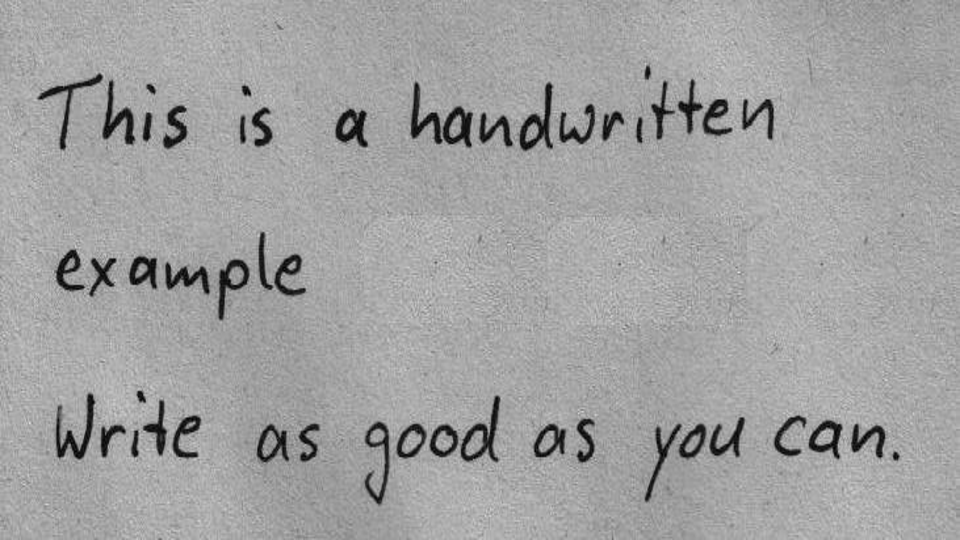

In [278]:
image = Image.open('handwrittensample.png')
image = image.resize((960,540))
image.save('sample.png')
image

In [279]:
custom_config = r'-l eng --oem 3 --psm 6' 
text = pytesseract.image_to_string(image,config=custom_config)
print(text)

This is a handwritten
example
Write as good aS you Can.



In [280]:
try:
    text=pytesseract.image_to_string(image,lang="eng")
    characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
    new_string = text
    for character in characters_to_remove:
        new_string = new_string.replace(character, "")
    print(new_string)
except IOError as e:
    print("Error (%s)." % e)

This is a handwritten
example

Write as good aS you Can.



In [281]:
image = cv2.imread('sample.png')

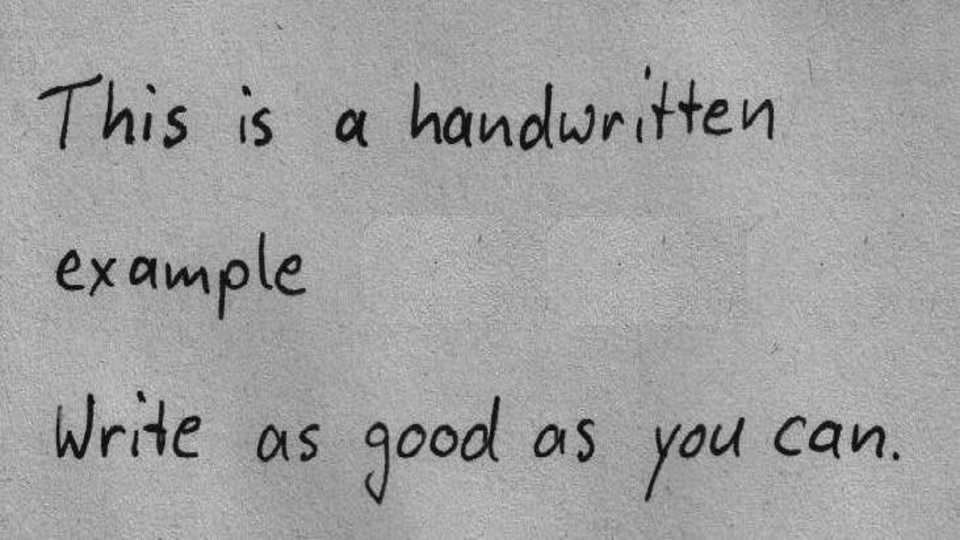

In [282]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

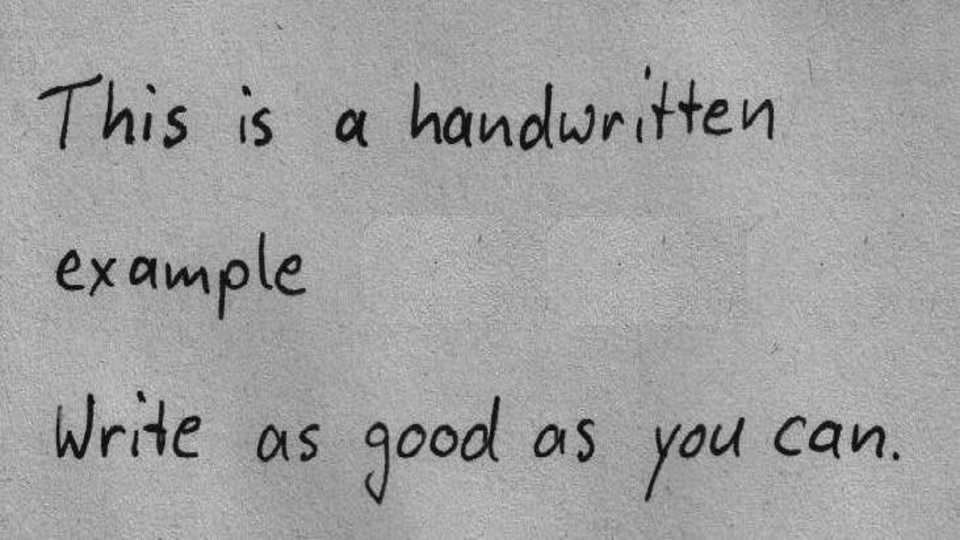

In [283]:
def remove_noise(image):
    return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

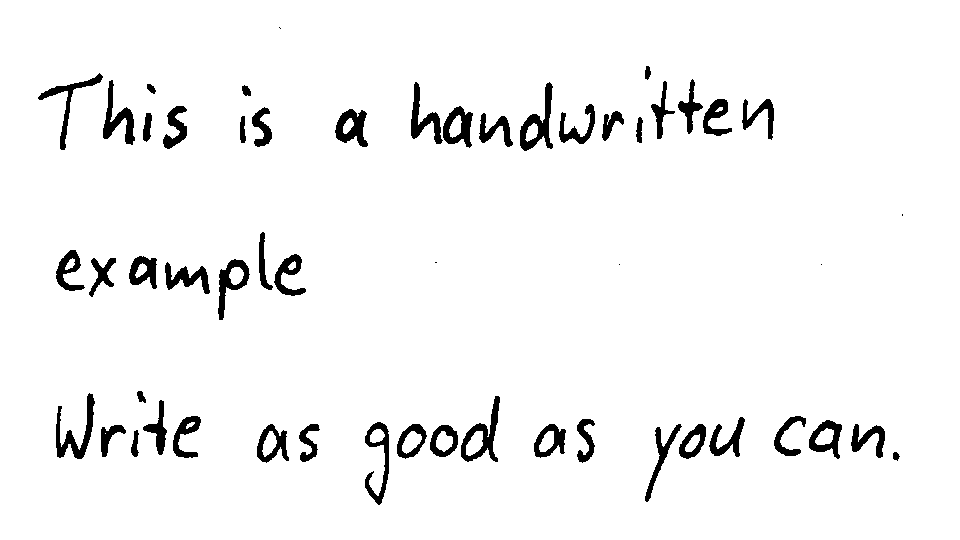

In [284]:
def thresholding(image):
                        # source image,  grayscale image
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)

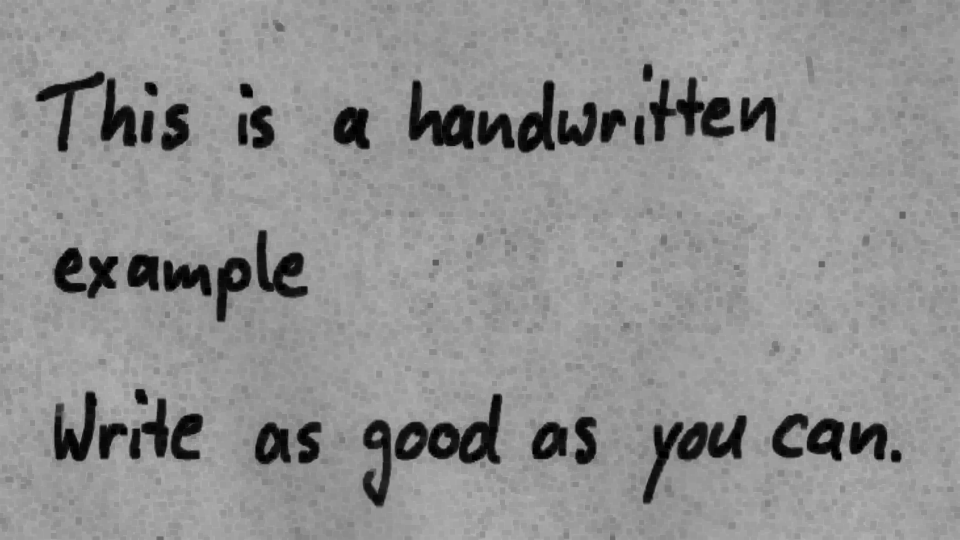

In [285]:
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

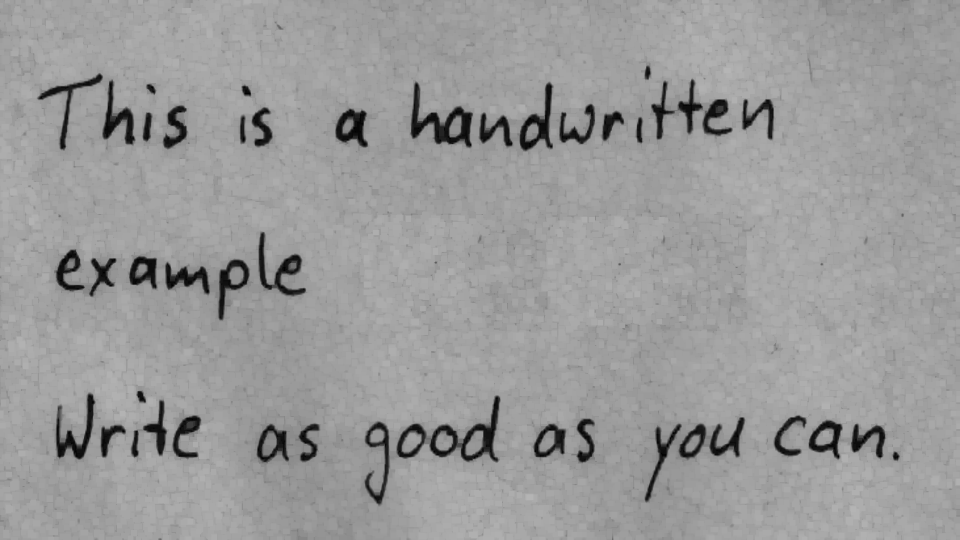

In [286]:
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

In [287]:
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
match = match_template(gray, gray)
match

array([[0.99999946]], dtype=float32)

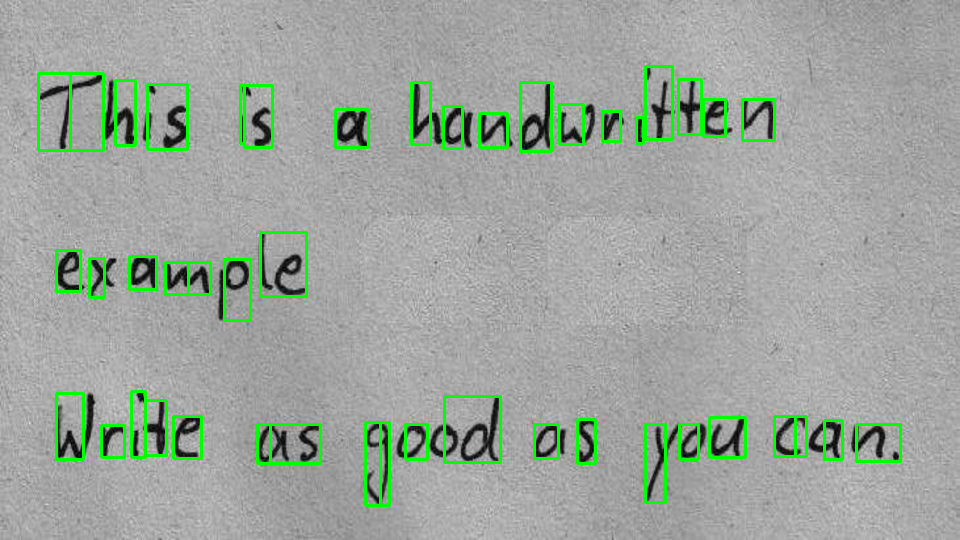

In [288]:
from google.colab.patches import cv2_imshow

img = cv2.imread('sample.png')
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)
cv2_imshow(img)

In [289]:
 !pip install tesserocr
 from tesserocr import PyTessBaseAPI, RIL
 
 with PyTessBaseAPI(psm=6, oem=1) as api:
            level = RIL.SYMBOL
            api.SetImageFile('sample.png')
            api.Recognize()
            ri = api.GetIterator()
            while True:
                letter = ri.GetUTF8Text(level)
                boxes = ri.BoundingBox(level)
                print(letter,"letter")
                print(boxes,"coordinates")
                if not ri.Next(level):
                  break

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
T letter
(38, 73, 71, 150) coordinates
h letter
(71, 73, 103, 150) coordinates
i letter
(115, 80, 135, 145) coordinates
s letter
(148, 84, 187, 149) coordinates
i letter
(240, 85, 246, 143) coordinates
s letter
(252, 107, 272, 147) coordinates
a letter
(335, 109, 368, 147) coordinates
h letter
(411, 82, 426, 144) coordinates
a letter
(426, 82, 459, 148) coordinates
n letter
(479, 113, 504, 147) coordinates
d letter
(520, 82, 548, 151) coordinates
w letter
(559, 104, 581, 144) coordinates
r letter
(602, 111, 618, 141) coordinates
i letter
(636, 117, 642, 143) coordinates
t letter
(645, 66, 671, 139) coordinates
t letter
(678, 79, 699, 134) coordinates
e letter
(703, 99, 724, 136) coordinates
n letter
(742, 99, 774, 140) coordinates
e letter
(56, 250, 80, 291) coordinates
x letter
(89, 258, 104, 297) coordinates
a letter
(129, 256, 156, 289) coordinates
m letter
(165, 262, 188, 294) coordin